Data shape: (54675, 13)
Number of components to retain 95.0% of variance: 11


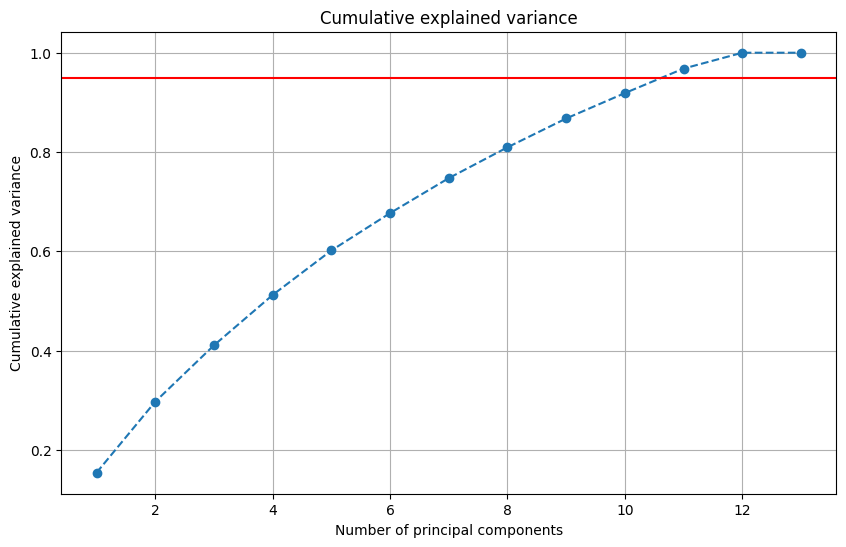

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset 
data = pd.read_csv('dataset/GSE12345_samples_Cleaned.csv', index_col=0)

# Check the shape of the data 
print(f"Data shape: {data.shape}")

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.T)  # Transpose - samples are rows

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set a variance threshold and determine the number of components
variance_threshold = 0.95  # Sample threshold
num_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1
print(f'Number of components to retain {variance_threshold * 100}% of variance: {num_components}')

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=variance_threshold, color='r', linestyle='-')
plt.title('Cumulative explained variance')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()


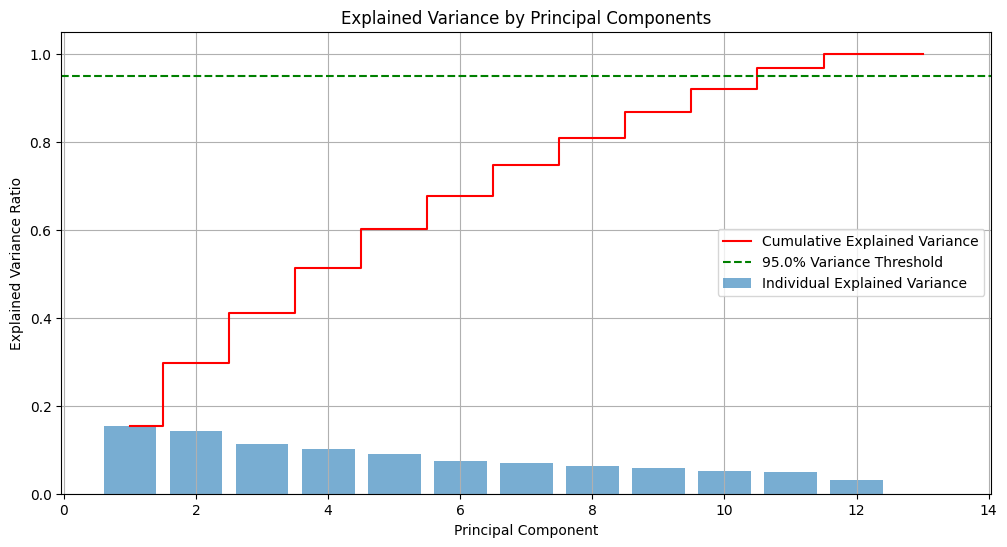

In [3]:

# Plot the Explained Variance
plt.figure(figsize=(12, 6))

# Bar plot for explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual Explained Variance')

# Line plot for cumulative explained variance
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance', color='red')

# Plot settings
plt.axhline(y=variance_threshold, color='green', linestyle='--', label=f'{variance_threshold*100}% Variance Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid()
plt.show()


Principal Component,Explained Variance Ratio,Cumulative Explained Variance
1,1.542332e-01,0.154233
2,1.429875e-01,0.297221
3,1.134933e-01,0.410714
4,1.014406e-01,0.512155
5,8.960962e-02,0.601764
6,7.522871e-02,0.676993
7,7.047147e-02,0.747464
8,6.208715e-02,0.809552
9,5.806459e-02,0.867616
10,5.114771e-02,0.918764


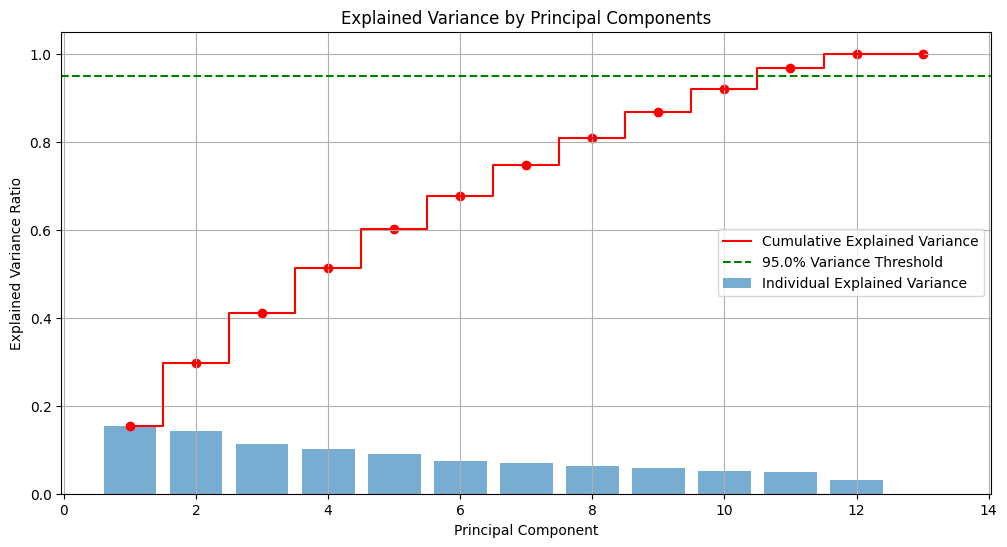

In [4]:
# Import necessary libraries
from IPython.display import display, HTML


# Create a DataFrame to display the coordinates
explained_variance_df = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_explained_variance
})

# Display the DataFrame without the default index
display(HTML(explained_variance_df.to_html(index=False)))

# Plot the Explained Variance
plt.figure(figsize=(12, 6))

# Bar plot for explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_df['Explained Variance Ratio'], alpha=0.6, label='Individual Explained Variance')

# Line plot for cumulative explained variance with dots at intersection points
plt.step(range(1, len(cumulative_explained_variance) + 1), explained_variance_df['Cumulative Explained Variance'], where='mid', label='Cumulative Explained Variance', color='red')
plt.scatter(range(1, len(cumulative_explained_variance) + 1), explained_variance_df['Cumulative Explained Variance'], color='red')

# Plot settings
plt.axhline(y=variance_threshold, color='green', linestyle='--', label=f'{variance_threshold*100}% Variance Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid()
plt.show()


In [5]:
# Transform the data using the selected number of principal components
pca = PCA(n_components=num_components)
transformed_data = pca.fit_transform(scaled_data)

# Create a DataFrame for the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(num_components)])
print(f"Transformed data shape: {transformed_df.shape}")

# Few rows of the transformed data
display(transformed_df.head())


Transformed data shape: (13, 11)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-166.663692,-87.760895,157.849396,-42.408817,-26.252993,58.576635,-20.314158,-28.524115,-38.059388,4.867968,-6.641321
1,-93.339622,-30.183807,-7.741890,25.354773,47.853283,-20.003219,32.046309,90.993251,72.752107,-39.326605,99.311765
2,-2.407139,-73.633517,-52.039012,-54.742666,19.768283,-110.883513,90.074449,-7.998829,-106.109606,-4.393843,2.906154
3,-23.458133,-80.870111,-31.163473,-27.927428,38.838134,-50.881447,1.222094,-35.677294,108.824423,82.506105,-64.638736
4,212.265726,-3.027503,162.036085,7.685550,30.258028,-27.713354,7.913212,-11.876165,15.778877,-3.307426,28.391153


In [6]:
from sklearn.cluster import KMeans

# Apply KMeans clustering 
kmeans = KMeans(n_clusters=6)  # Example: 6 clusters
clusters = kmeans.fit_predict(transformed_df)

# Add the cluster labels to the transformed DataFrame
transformed_df['Cluster'] = clusters

# Few rows of the transformed data with clusters
display(transformed_df.head())


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,Cluster
0,-166.663692,-87.760895,157.849396,-42.408817,-26.252993,58.576635,-20.314158,-28.524115,-38.059388,4.867968,-6.641321,2
1,-93.339622,-30.183807,-7.741890,25.354773,47.853283,-20.003219,32.046309,90.993251,72.752107,-39.326605,99.311765,5
2,-2.407139,-73.633517,-52.039012,-54.742666,19.768283,-110.883513,90.074449,-7.998829,-106.109606,-4.393843,2.906154,4
3,-23.458133,-80.870111,-31.163473,-27.927428,38.838134,-50.881447,1.222094,-35.677294,108.824423,82.506105,-64.638736,4
4,212.265726,-3.027503,162.036085,7.685550,30.258028,-27.713354,7.913212,-11.876165,15.778877,-3.307426,28.391153,1


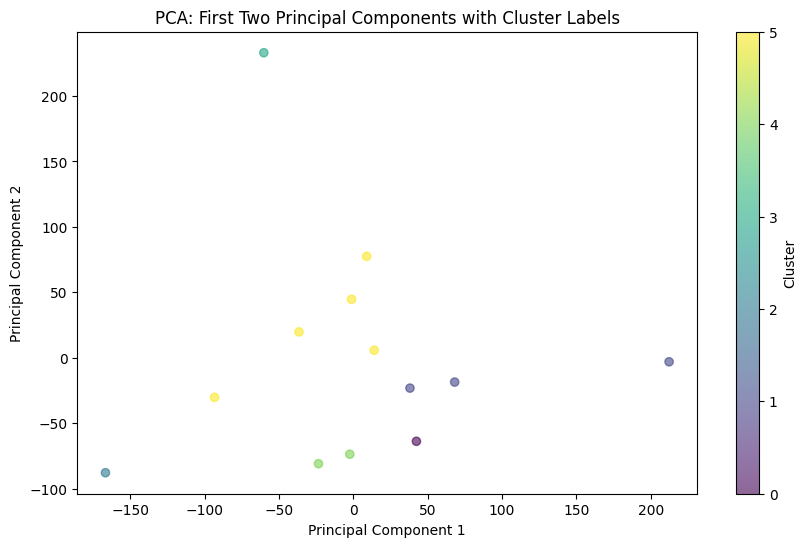

In [7]:
# Plot the first two principal components with cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(transformed_df['PC1'], transformed_df['PC2'], c=transformed_df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA: First Two Principal Components with Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [8]:
# Obtain the PCA components (loadings)
loadings = pca.components_

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(num_components)], index=data.index)
print("PCA Loadings (first few rows):")
display(loadings_df.head())

# Interpret the first principal component
print("Features contributing to the first principal component:")
print(loadings_df['PC1'].sort_values(ascending=False).head(10))  # Top 10 features contributing to PC1


PCA Loadings (first few rows):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
ID_REF,,,,,,,,,,,
1007_s_at,0.002736,0.004093,0.006071,-0.000095,0.008665,0.004507,-0.006885,0.003840,0.003169,0.001796,0.000655
1053_at,0.001417,0.002388,-0.002229,-0.007061,0.006845,0.001233,0.005311,0.001745,-0.006919,-0.004878,-0.007355
117_at,0.002527,-0.002600,-0.009137,-0.005896,0.004484,0.002064,0.003094,-0.005746,0.004285,0.000222,-0.001951
121_at,-0.001865,0.002131,-0.001589,-0.001436,-0.003099,-0.011208,0.008658,-0.002465,-0.004407,0.002758,-0.004874
1255_g_at,0.001375,-0.004176,-0.005049,-0.005069,-0.004105,-0.006728,-0.003182,-0.004739,-0.004646,-0.008910,0.002553


Features contributing to the first principal component:
ID_REF
207945_s_at    0.011314
218360_at      0.011095
224469_s_at    0.011060
201783_s_at    0.011020
218151_x_at    0.011018
212804_s_at    0.010994
221050_s_at    0.010928
225235_at      0.010912
213787_s_at    0.010884
225933_at      0.010855
Name: PC1, dtype: float64
